# Practice 1: Linearly separable points

**Ojeda Contreras Braulio Melquisedec**

**February 22th, 2022**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

The following function was made for 2D points

In [2]:
def generate_linearly_separable_points(dim, num_points, max_num_value, min_num_value, classes):
    random.seed(10)
    points_ls = list()
    for i in range(num_points):
        points_ls.append(np.array([1] + [random.uniform(min_num_value, max_num_value) for j in range(dim)]))
    points_array = np.array(points_ls)
    
    # First value is going to be the constant added to the hyperplane
    # For example, in case of 2D the first value is the b value of the equation of the line y = mx + b
    hyperplane = np.array([random.uniform(min_num_value, max_num_value) for i in range(dim + 1)])
    print("Hyperplane", hyperplane)
    
    # Calculating the respective evaluation of the 'dim-1' coords of a point on the hyperplane and then labeling the points
    labeled_points = list()
    labeled_points_aux = list()
    for i in range(num_points):
        point = points_array[i]
        evaluation = (- 1 / hyperplane[-1]) * (np.dot(hyperplane[:dim], point[:dim]))
        if evaluation >= point[-1]:
            labeled_points.append((point, classes[0]))
            labeled_points_aux.append((point[1:], classes[0]))
        else:
            labeled_points.append((point, classes[1]))
            labeled_points_aux.append((point[1:], classes[1]))
    
    x_1, y_1, x_2, y_2 = separate_coords_classes(labeled_points_aux, classes)
    plot_separator_line_2D(x_1, y_1, x_2, y_2, min_num_value, max_num_value, hyperplane)
    
    return labeled_points, labeled_points_aux

In [3]:
def plot_separator_line_2D(x_1, y_1, x_2, y_2, min_num_value, max_num_value, w):
    # Building the random line that separates points
    x_line = np.linspace(min_num_value, max_num_value, 10000)
    y_line = (- 1 / w[-1]) * (w[0] + w[1] * x_line)
    plt.scatter(x_1, y_1)
    plt.scatter(x_2, y_2)
    plt.plot(x_line, y_line)
    plt.show()

In [4]:
def separate_coords_classes(labeled_points, classes):
    # Separating points by classes
    points_class_1 = [lp[0] for lp in labeled_points if lp[1] == classes[0]]
    points_class_2 = [lp[0] for lp in labeled_points if lp[1] == classes[1]]
    
    # Extracting the respective coords for each class
    x_1 = list(list(zip(*points_class_1))[0])
    y_1 = list(list(zip(*points_class_1))[1])
    x_2 = list(list(zip(*points_class_2))[0])
    y_2 = list(list(zip(*points_class_2))[1])
    
    return x_1, y_1, x_2, y_2

In [5]:
def h(w, x, classes):
    h_x = np.dot(w, x)
    if h_x >= 0:
        return classes[0]
    else:
        return classes[1]

In [6]:
def separate_points(dim, min_num_value, max_num_value, labeled_points, labeled_points_aux, classes):
    random.seed(20)
    ws = list()
    w_index = 0
    ws.append(np.array([random.uniform(min_num_value, max_num_value) for i in range(dim + 1)]))
    flag_msclf = True
    while flag_msclf:
        misclassified_points_indexes = list()
        for i in range(len(labeled_points)):
            lp = labeled_points[i]
            h_x = h(ws[w_index], lp[0], classes)
            if lp[1] != h_x:
                misclassified_points_indexes.append(i)
        if len(misclassified_points_indexes) == 0:
            flag_msclf = False
            print("w_", w_index, "=", ws[w_index])
            plot_separator_line_2D(x_1, y_1, x_2, y_2, min_num_value, max_num_value, ws[w_index])
        else:
            msclf_lb_pt = labeled_points[misclassified_points_indexes[0]]
            x_1, y_1, x_2, y_2 = separate_coords_classes(labeled_points_aux, classes)
            if w_index % 50 == 0:
                print("w_" + str(w_index) + " = " + str(ws[w_index]))
                plot_separator_line_2D(x_1, y_1, x_2, y_2, min_num_value, max_num_value, ws[w_index])
            ws.append(ws[-1] + msclf_lb_pt[1] * msclf_lb_pt[0])
            w_index += 1

In [7]:
dim = 2
num_points = 200
max_num_value = 10
min_num_value = -10
classes = [1, -1]

Hyperplane [-4.0092332   7.02176086 -6.48913906]


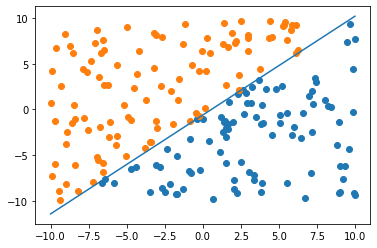

In [8]:
labeled_points, labeled_points_aux = generate_linearly_separable_points(dim, num_points, max_num_value, min_num_value, classes)

In [9]:
#labeled_points

In [10]:
#labeled_points_aux

w_0 = [8.11279352 3.72508314 5.33018513]


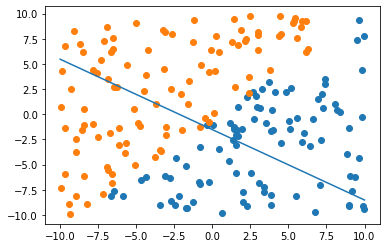

w_50 = [  6.11279352   8.74997855 -21.50270397]


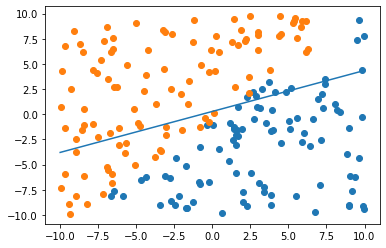

w_100 = [  8.11279352  18.01634836 -27.2244324 ]


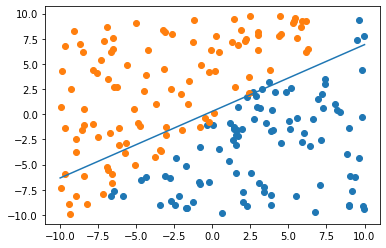

w_150 = [  8.11279352  36.56562458 -22.48823929]


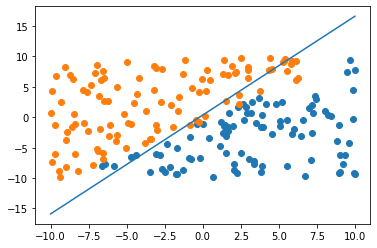

w_200 = [  4.11279352  31.44534602 -41.10192977]


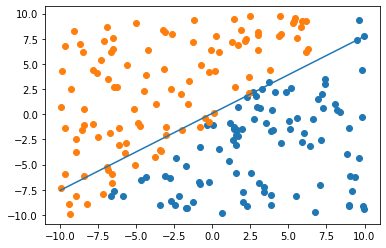

w_250 = [ -1.88720648  41.53900914 -43.10686191]


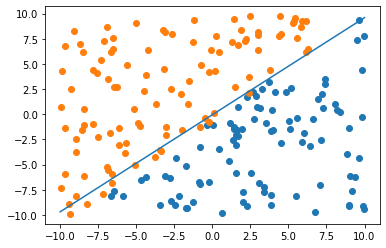

w_300 = [ -7.88720648  49.4038823  -47.33015496]


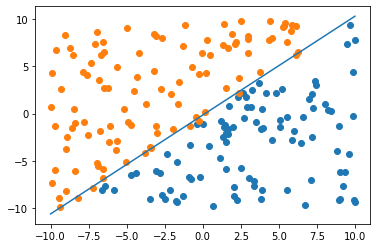

w_350 = [-15.88720648  54.1028973  -50.89473729]


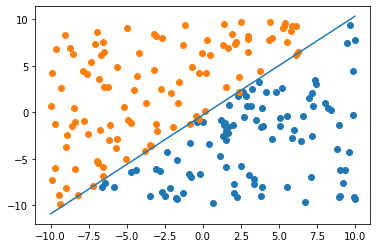

w_400 = [-25.88720648  56.04710113 -53.94257292]


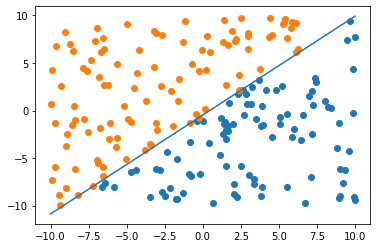

w_ 438 = [-29.88720648  59.21725701 -54.75309056]


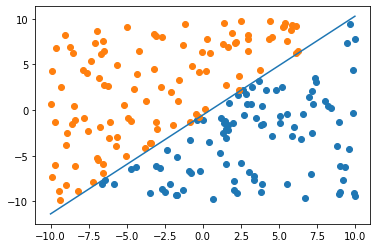

In [11]:
separate_points(dim, min_num_value, max_num_value, labeled_points, labeled_points_aux, classes)